# TA session #01

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

import warnings
warnings.filterwarnings('ignore')

Load dataset.

In [2]:
data = pd.read_csv('Data/Credit.csv', index_col=0)
data.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


# 1. EDA

In [13]:
def classify_knn(n_neighbors, predictor_1, predictor_2):
    X = data[[predictor_1,predictor_2]].iloc[10:] # input variables here
    y = np.where(data.iloc[10:]['Balance']>400,1,0) # output variables here
    
    
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X, y)
    y_pred = clf.predict(X)

    h = 0.5

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

    x_min, x_max = X[predictor_1].min() - 1, X[predictor_1].max() + 1
    y_min, y_max = X[predictor_2].min() - 1, X[predictor_2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    score = clf.score(data[[predictor_1, predictor_2]].iloc[:10], 
                      np.array([int(i > 400) for i in data['Balance'].iloc[:10]]))
    
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[predictor_1], X[predictor_2], c=y_pred, cmap=cmap_bold, s=10)
    plt.title('K=%i, Accuracy=%.1f' %(n_neighbors, score))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

In [30]:
#TODO
data.info()
data.describe()
data.shape
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 12 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
Balance2     400 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 60.6+ KB


,Income,Limit,Rating,Cards,Age,Education,Balance,Balance2
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000,0.600000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877,0.490511
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000,0.000000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000,1.000000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000,1.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000,1.000000


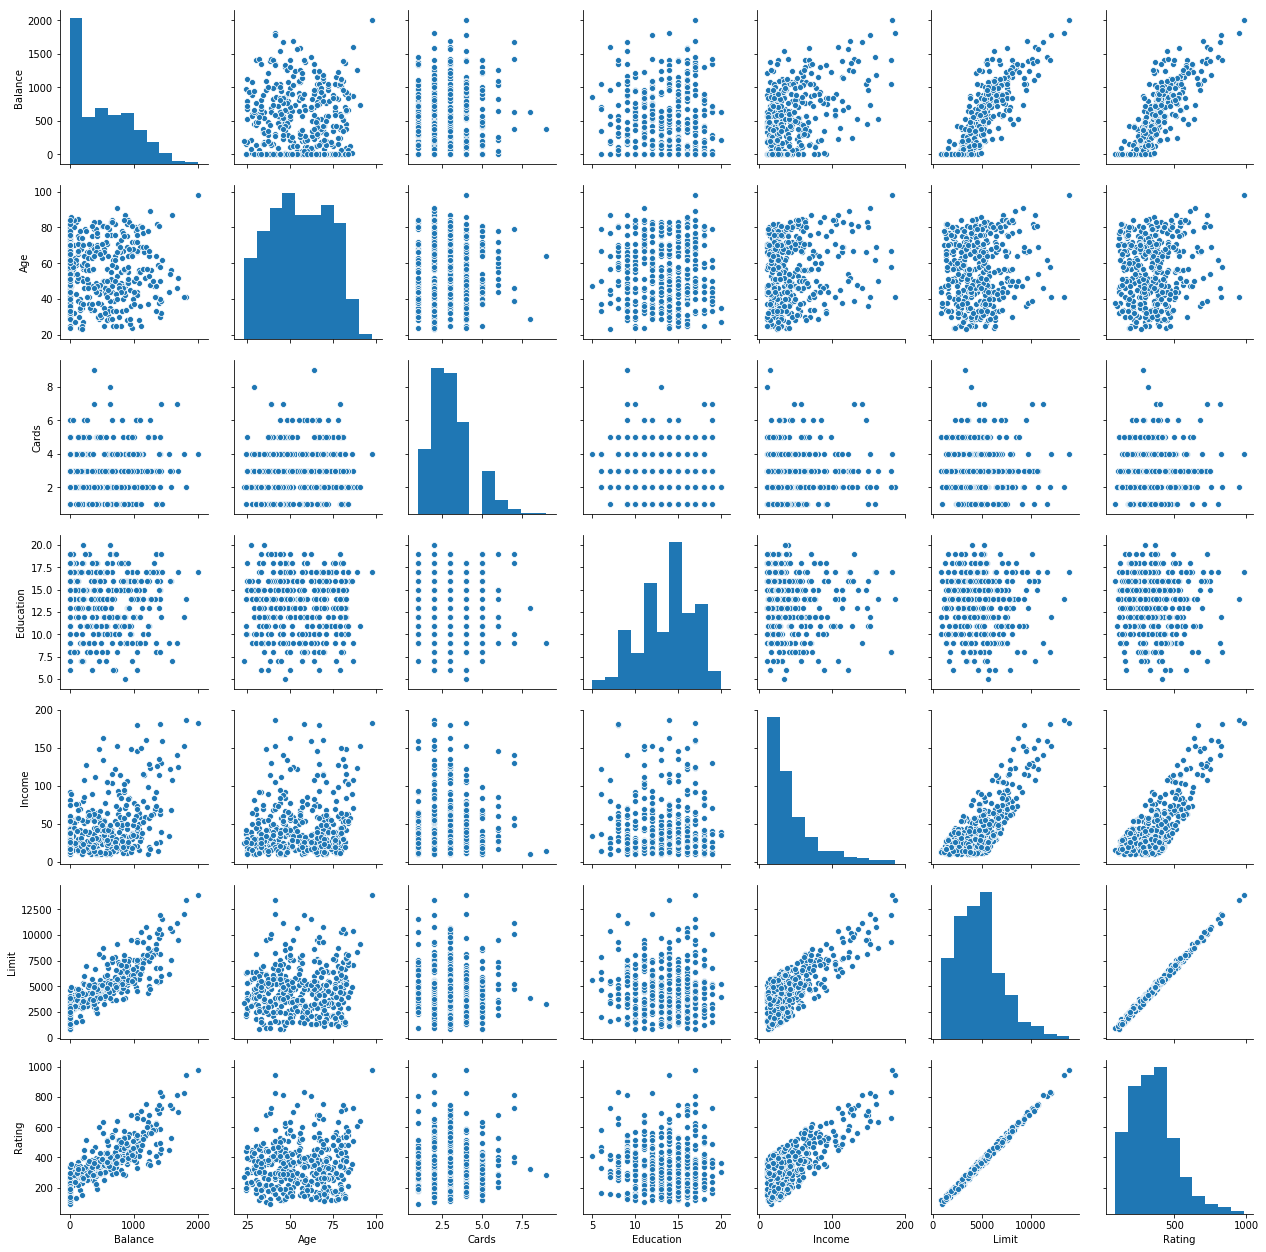

In [5]:
sns.pairplot(data[['Balance','Age','Cards','Education','Income','Limit','Rating']]);

In [6]:
cols = data.columns
cols
y_ax = ['Balance','Age','Cards','Education','Income','Limit','Rating']
x_ax = list(set(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender','Student', 'Married', 'Ethnicity', 'Balance'])-set(y_ax))

print(x_ax)
print(y_ax)

['Married', 'Ethnicity', 'Gender', 'Student']
['Balance', 'Age', 'Cards', 'Education', 'Income', 'Limit', 'Rating']


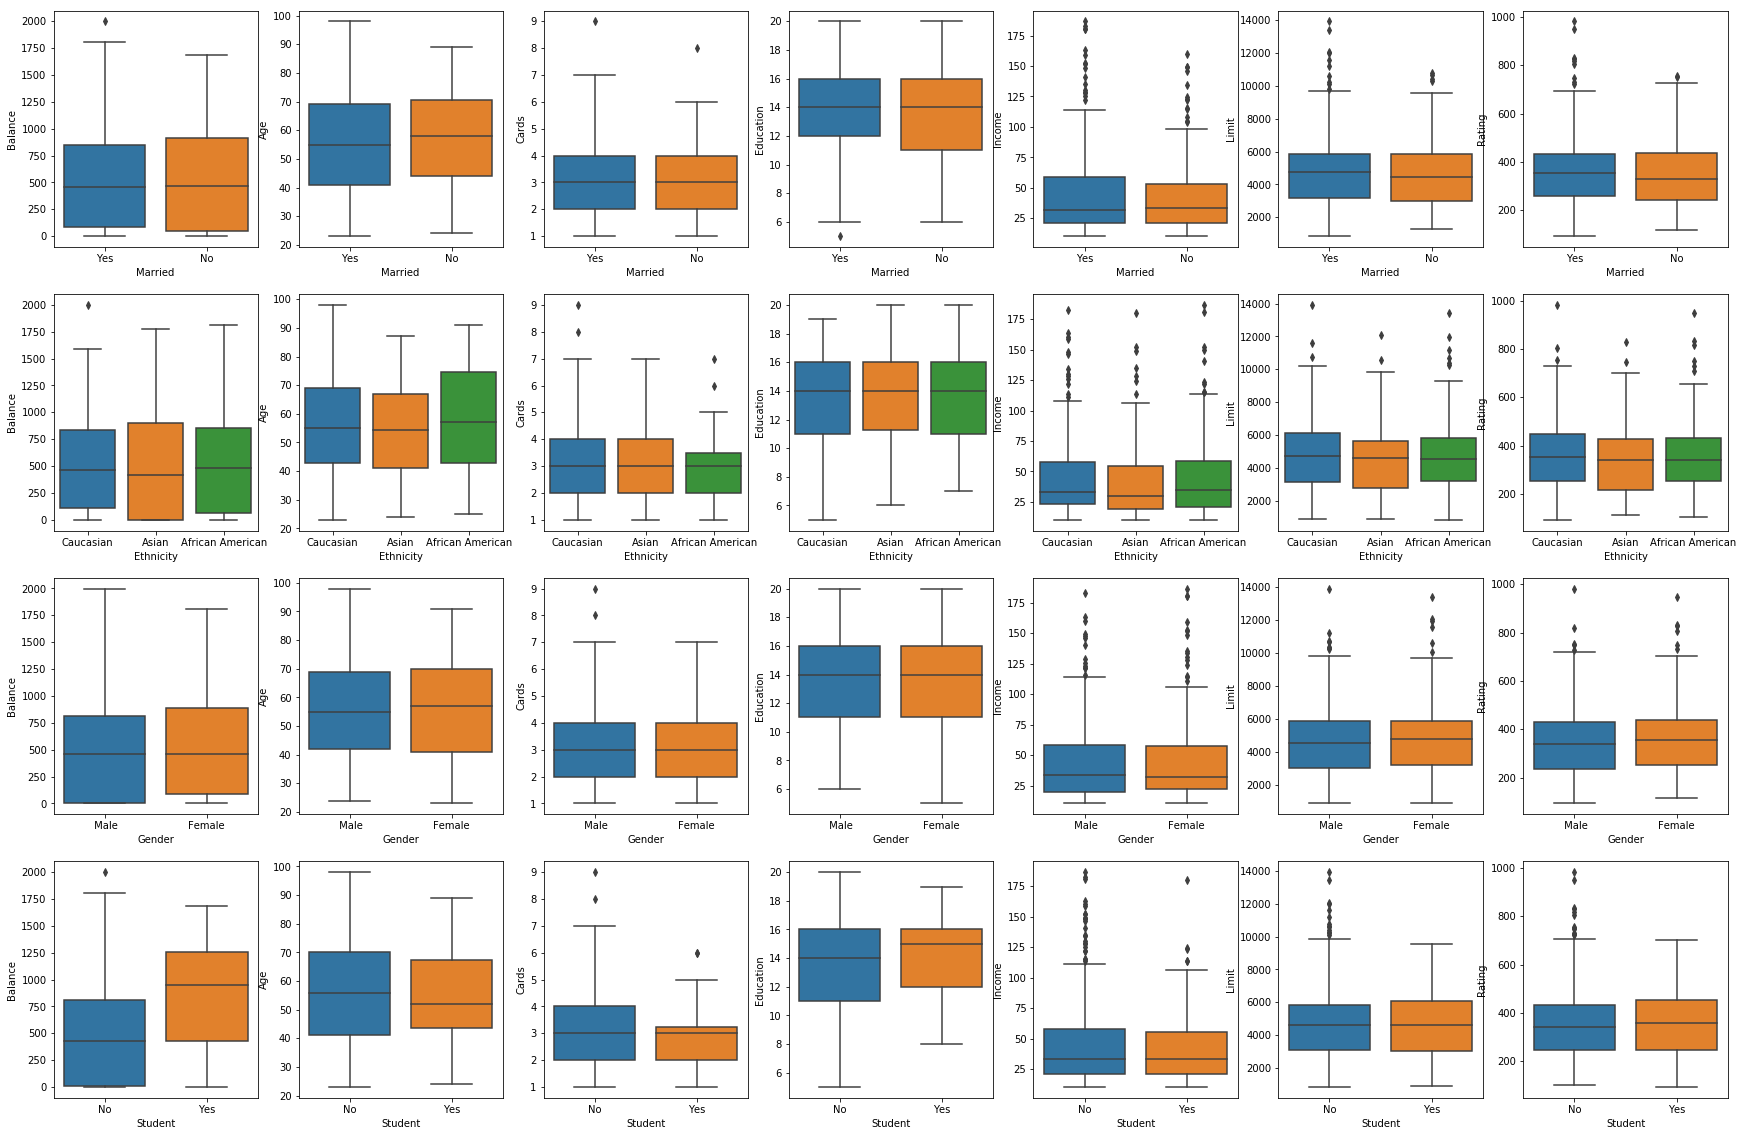

In [28]:
fig, axes = plt.subplots(nrows=int(len(x_ax)), ncols=int(len(y_ax)), figsize=(30, 20))
for i in range(len(x_ax)):
    for j in range(len(y_ax)):
        sns.boxplot(x=x_ax[i], y=y_ax[j], data=data, ax=axes[i,j]) 
        
    

• Data overview: <br>
    Data shape : (400, 12)<br>
    Variable types : Income       400 non-null float64 <br>
                     Limit        400 non-null int64<br>
                     Rating       400 non-null int64<br>
                     Cards        400 non-null int64<br>
                     Age          400 non-null int64<br>
                     Education    400 non-null int64<br>
                     Gender       400 non-null object<br>
                     Student      400 non-null object<br>
                     Married      400 non-null object<br>
                     Ethnicity    400 non-null object<br>
                     Balance      400 non-null int64<br>
                     Balance2     400 non-null int64<br>
. <br>
<br>



•Sanity check: <br>
    NaN/Exceptions/Typos : non-null <br>
    Outlier detection : Cards, Income에 좀 있다<br>

•Basic statistics: <br>
    Count, Mean, Std, Min/Max, Median, IQR(Q3-Q1),<br>
    Income	Limit	Rating	Cards	Age	Education	Balance	Balance2<br>
    count	400.000000	400.000000	400.000000	400.000000	400.000000	400.000000	400.000000	400.000000<br>
    mean	45.218885	4735.600000	354.940000	2.957500	55.667500	13.450000	520.015000	0.600000<br>
    std	35.244273	2308.198848	154.724143	1.371275	17.249807	3.125207	459.758877	0.490511<br>
    min	10.354000	855.000000	93.000000	1.000000	23.000000	5.000000	0.000000	0.000000<br>
    25%	21.007250	3088.000000	247.250000	2.000000	41.750000	11.000000	68.750000	0.000000<br>
    50%	33.115500	4622.500000	344.000000	3.000000	56.000000	14.000000	459.500000	1.000000<br>
    75%	57.470750	5872.750000	437.250000	4.000000	70.000000	16.000000	863.000000	1.000000<br>
    max	186.634000	13913.000000	982.000000	9.000000	98.000000	20.000000	1999.000000	1.000000<br>

# 2. KNN

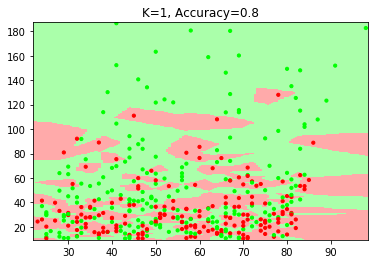

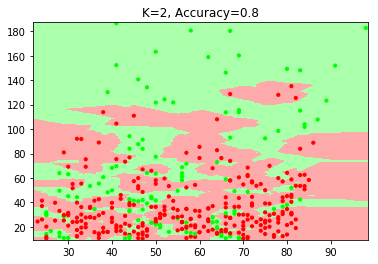

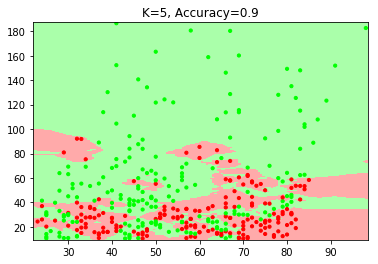

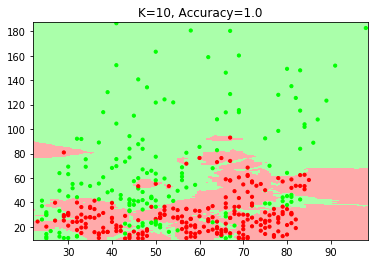

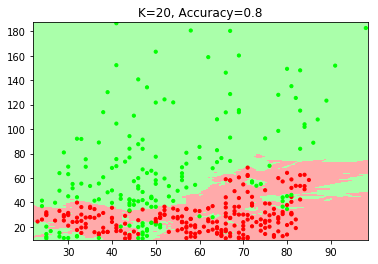

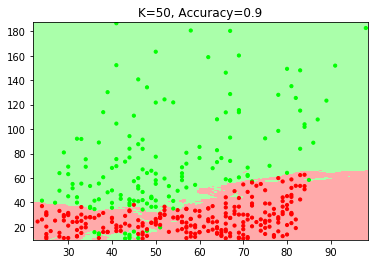

In [14]:
def bal(credit):
    if credit['Balance'] > 300:
        return 1
    else:
        return 0

data['Balance2'] = data.apply(bal, axis=1)

K = [1,2,5,10,20,50]
for i in K:
    classify_knn(i,'Age','Income')

k 값이 작을 수록 boundary가 flexible 하다. <br>
k = 10에서 정확도가 가장 크다. <br>
k 값이 커질수록 bias가 작아지고 variance가 커지므로 k=10에서 최적값을 가진다. <br>


# 3. 5-fold Cross Validation

In [23]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
X = data[['Income','Age']] # input variables here
y = np.where(data['Balance']>400,1,0) # output variables here
for i in K:    
    knn_cv = neighbors.KNeighborsClassifier(n_neighbors=i)
    #train model with cv of 5 
    cv_scores = cross_val_score(knn_cv, X, y, cv=5)
    #print each cv score (accuracy) and average them
    print(cv_scores)
    print('k value : %s, cv_scores mean: %s '%(str(i), np.mean(cv_scores)))

[0.65432099 0.62962963 0.475      0.55696203 0.60759494]
k value : 1, cv_scores mean: 0.5847015158618534 
[0.62962963 0.59259259 0.4875     0.59493671 0.58227848]
k value : 2, cv_scores mean: 0.577387482419128 
[0.72839506 0.64197531 0.5875     0.49367089 0.56962025]
k value : 5, cv_scores mean: 0.6042323019221753 
[0.74074074 0.58024691 0.6125     0.53164557 0.56962025]
k value : 10, cv_scores mean: 0.6069506954211595 
[0.60493827 0.55555556 0.6        0.51898734 0.58227848]
k value : 20, cv_scores mean: 0.5723519299890608 
[0.59259259 0.56790123 0.6        0.55696203 0.62025316]
k value : 50, cv_scores mean: 0.5875418034067822 


knn의 결과와 동일하게 k = 10 에서 cv_scores mean값이 가장 크다. <br>
k value : 10, cv_scores mean: 0.6069506954211595 

# 4. Train/Test Split

In [ ]:
#TODO

# 5. Overfitting

In [ ]:
#TODO

# 6. Feature selection

In [ ]:
# TODO